# Feature summary analysis of gender only differential expression

In [1]:
import numpy as np
import pandas as pd
from venn import venn
from matplotlib import pyplot as plt

from plotnine import *
from warnings import filterwarnings
from matplotlib.cbook import mplDeprecation
filterwarnings("ignore",category=mplDeprecation)

## Summary plots

### Genes

In [2]:
genes = pd.read_csv('../../_m/genes/diffExpr_EAvsAA_full.txt', 
                    sep='\t', index_col=0)
genes = genes[(genes['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
genes['Feature'] = genes.index
genes = genes[['Feature', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']]
genes['Type'] = 'gene'
genes.head()

,Feature,Symbol,ensemblID,logFC,adj.P.Val,Type
ENSG00000272977.1,ENSG00000272977.1,NaN,ENSG00000272977,2.197155,1.293546e-22,gene
ENSG00000233913.7,ENSG00000233913.7,NaN,ENSG00000233913,-2.941671,1.511451e-22,gene
ENSG00000259479.6,ENSG00000259479.6,SORD2P,ENSG00000259479,-2.338783,2.536508e-22,gene
ENSG00000068654.15,ENSG00000068654.15,POLR1A,ENSG00000068654,0.292087,6.364724e-22,gene
ENSG00000084628.9,ENSG00000084628.9,NKAIN1,ENSG00000084628,1.891807,9.739085e-21,gene


### Transcripts

In [3]:
trans = pd.read_csv('../../_m/transcripts/diffExpr_EAvsAA_full.txt', 
                    sep='\t', index_col=0)
trans = trans[(trans['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
trans['Feature'] = trans.index
trans['ensemblID'] = trans.gene_id.str.replace('\\.\d+', '', regex=True)
trans = trans[['Feature', 'gene_name', 'ensemblID', 
               'logFC', 'adj.P.Val']].rename(columns={'gene_name': 'Symbol'})
trans['Type'] = 'transcript'
trans.head()

<ipython-input-3-dac7c89836a0>:5: FutureWarning: The default value of regex will change from True to False in a future version.


,Feature,Symbol,ensemblID,logFC,adj.P.Val,Type
ENST00000263857.10,ENST00000263857.10,POLR1A,ENSG00000068654,0.654706,3.726088e-27,transcript
ENST00000609475.1,ENST00000609475.1,CTA-390C10.10,ENSG00000272977,0.958957,1.058996e-23,transcript
ENST00000437355.6,ENST00000437355.6,PSPH,ENSG00000146733,-2.296226,3.478487e-23,transcript
ENST00000415709.5,ENST00000415709.5,CRYBB2P1,ENSG00000100058,-1.974812,4.138101e-20,transcript
ENST00000373736.6,ENST00000373736.6,NKAIN1,ENSG00000084628,1.885054,4.138101e-20,transcript


### Exons

In [5]:
exons = pd.read_csv('../../_m/exons/diffExpr_EAvsAA_full.txt', 
                    sep='\t', index_col=0)
exons = exons[(exons['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
exons['Feature'] = exons.index
exons = exons[['Feature', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']]
exons['Type'] = 'exon'
exons.head()

,Feature,Symbol,ensemblID,logFC,adj.P.Val,Type
e1124727,e1124727,CRYBB2P1,ENSG00000100058,2.057724,3.168478e-38,exon
e364586,e364586,NaN,ENSG00000233913,-2.024020,3.168478e-38,exon
e1124742,e1124742,CRYBB2P1,ENSG00000100058,1.954431,5.472789e-38,exon
e1124745,e1124745,NaN,ENSG00000272977,1.728919,1.040033e-37,exon
e1176412,e1176412,RPL10,ENSG00000147403,0.943988,1.845650e-37,exon


### Junctions

In [6]:
juncs = pd.read_csv('../../_m/junctions/diffExpr_EAvsAA_full.txt', 
                    sep='\t', index_col=0)
juncs = juncs[(juncs['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
juncs['Feature'] = juncs.index
juncs = juncs[['Feature', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']]
juncs['Type'] = 'junction'
juncs.head()

,Feature,Symbol,ensemblID,logFC,adj.P.Val,Type
chr1:1668473-1675462(-),chr1:1668473-1675462(-),SLC35E2B,ENSG00000189339,2.793313,2.457167e-42,junction
chr3:129488398-129495445(+),chr3:129488398-129495445(+),IFT122,ENSG00000163913,2.787213,2.963183e-38,junction
chr22:25459516-25460866(+),chr22:25459516-25460866(+),CRYBB2P1,ENSG00000100058,2.247774,3.515221e-34,junction
chr7:152329500-152367154(+),chr7:152329500-152367154(+),NaN,NaN,-2.686755,6.104106e-33,junction
chr12:124913268-124913495(-),chr12:124913268-124913495(-),UBC,ENSG00000150991,2.877263,5.148717e-27,junction


## DE summary

### DE (feature)

In [7]:
gg = len(set(genes['Feature']))
tt = len(set(trans['Feature']))
ee = len(set(exons['Feature']))
jj = len(set(juncs['Feature']))

print("\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d" % 
      (gg, tt, ee, jj)) 


Gene:		3933
Transcript:	5419
Exon:		23926
Junction:	6402


#### DE (EnsemblID)

In [8]:
gg = len(set(genes['ensemblID']))
tt = len(set(trans['ensemblID']))
ee = len(set(exons['ensemblID']))
jj = len(set(juncs['ensemblID']))

print("\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d" % 
      (gg, tt, ee, jj)) 


Gene:		3933
Transcript:	4068
Exon:		5568
Junction:	2526


#### DE (Gene Symbol)

In [9]:
gg = len(set(genes['Symbol']))
tt = len(set(trans['Symbol']))
ee = len(set(exons['Symbol']))
jj = len(set(juncs['Symbol']))

print("\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d" % 
      (gg, tt, ee, jj)) 


Gene:		3172
Transcript:	4064
Exon:		4854
Junction:	2526


### Feature effect size summary

In [10]:
feature_list = ['Genes', 'Transcript', 'Exons', 'Junctions']
feature_df = [genes, trans, exons, juncs]
for ii in range(4):
    ff = feature_df[ii]
    half = len(set(ff[(np.abs(ff['logFC']) >= 0.5)].Feature))
    one = len(set(ff[(np.abs(ff['logFC']) >= 1)].Feature))
    print("\nThere are %d unique %s with abs(log2FC) >= 0.5" % (half, feature_list[ii]))
    print("There are %d unique %s with abs(log2FC) >= 1" % (one, feature_list[ii]))


There are 71 unique Genes with abs(log2FC) >= 0.5
There are 31 unique Genes with abs(log2FC) >= 1

There are 215 unique Transcript with abs(log2FC) >= 0.5
There are 137 unique Transcript with abs(log2FC) >= 1

There are 818 unique Exons with abs(log2FC) >= 0.5
There are 394 unique Exons with abs(log2FC) >= 1

There are 522 unique Junctions with abs(log2FC) >= 0.5
There are 225 unique Junctions with abs(log2FC) >= 1


In [11]:
feature_list = ['Genes', 'Transcripts', 'Exons', 'Junctions']
feature_df = [genes, trans, exons, juncs]
for ii in range(4):
    ff = feature_df[ii]
    half = len(set(ff[(np.abs(ff['logFC']) >= 0.5)].ensemblID))
    one = len(set(ff[(np.abs(ff['logFC']) >= 1)].ensemblID))
    print("\nThere are %d unique %s with abs(log2FC) >= 0.5" % (half, feature_list[ii]))
    print("There are %d unique %s with abs(log2FC) >= 1" % (one, feature_list[ii]))


There are 71 unique Genes with abs(log2FC) >= 0.5
There are 31 unique Genes with abs(log2FC) >= 1

There are 112 unique Transcripts with abs(log2FC) >= 0.5
There are 67 unique Transcripts with abs(log2FC) >= 1

There are 84 unique Exons with abs(log2FC) >= 0.5
There are 32 unique Exons with abs(log2FC) >= 1

There are 72 unique Junctions with abs(log2FC) >= 0.5
There are 22 unique Junctions with abs(log2FC) >= 1


## Plot venn diagram

In [12]:
features = {
    'Genes': set(genes['ensemblID']),
    'Transcripts': set(trans['ensemblID']),
    'Exons': set(exons['ensemblID']),
    'Junctions': set(juncs['ensemblID']),
}

<Figure size 432x288 with 0 Axes>

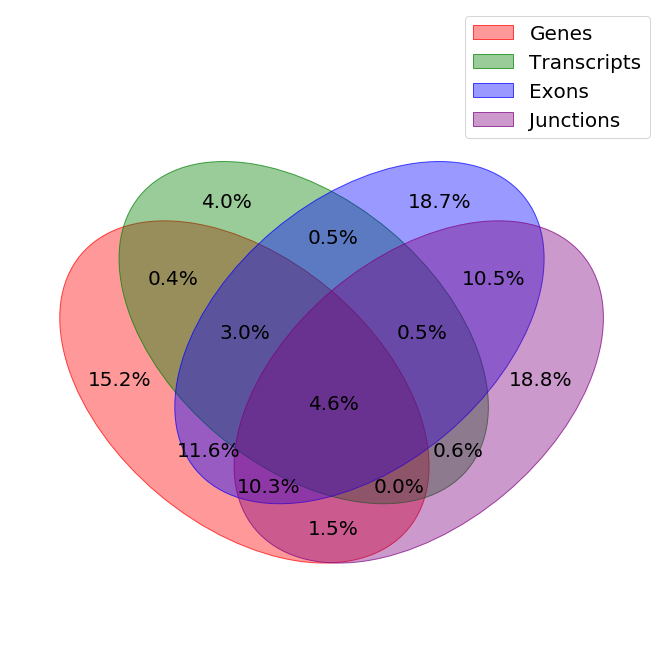

In [13]:
plt.figure(1)
venn(features, fmt="{percentage:0.1f}%", legend_loc="best", figsize=(12,12), 
     fontsize=20, cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('DE_allFeatures_venn_diagram_percentage.png')
plt.savefig('DE_allFeatures_venn_diagram_percentage.pdf')
plt.savefig('DE_allFeatures_venn_diagram_percentage.svg')
plt.show()

<Figure size 432x288 with 0 Axes>

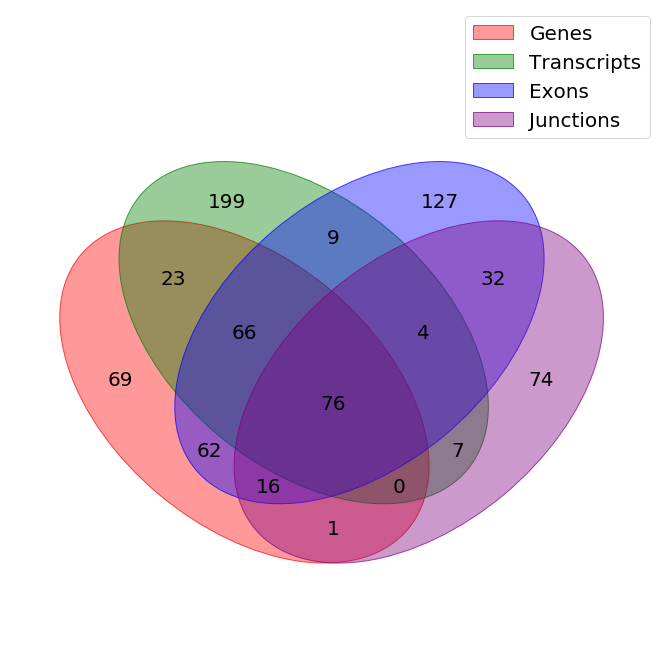

In [13]:
plt.figure(1)
venn(features, fmt="{size}", legend_loc="best", figsize=(12,12), 
     fontsize=20, cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('DE_allFeatures_venn_diagram_size.png')
plt.savefig('DE_allFeatures_venn_diagram_size.pdf')
plt.savefig('DE_allFeatures_venn_diagram_size.svg')
plt.show()